# Best Rating Books



---

The **Amazon Data Science Books Dataset** is stored in [Kaggle](https://www.kaggle.com/datasets/die9origephit/amazon-data-science-books)

The objective of this nootbook is to label the data based on all features given using the K-Means algorithm. We will also create a "weighted_rating" feature to compare the cluster labels.The intent is also prepare unlabeled data for future analysis  (EDA, ML, DP, etc.). This is are the different steps on this simple project:

1.   Data Collection
2.   Data Cleaning
3.   Feature Engineering
4.   Cluster Model
5.   Next Steps


# DATA COLLECTION

In [302]:
# Import usefull libraries
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Deactivate warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

In [303]:
# collect data in a pandas dataframe
df = pd.read_csv('final_book_dataset_kaggle2.csv')

In [304]:
df.head()

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23,55%,39%,6%,NaN,NaN,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124,61%,20%,9%,4%,6%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10,87%,13%,NaN,NaN,NaN,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,"1,686",75%,16%,5%,2%,2%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12,52%,17%,10%,10%,10%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...


In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         830 non-null    object 
 1   author                        657 non-null    object 
 2   price                         722 non-null    float64
 3   price (including used books)  722 non-null    object 
 4   pages                         745 non-null    object 
 5   avg_reviews                   702 non-null    float64
 6   n_reviews                     702 non-null    object 
 7   star5                         702 non-null    object 
 8   star4                         635 non-null    object 
 9   star3                         554 non-null    object 
 10  star2                         451 non-null    object 
 11  star1                         328 non-null    object 
 12  dimensions                    644 non-null    object 
 13  weigh

In [306]:
df.shape

(830, 19)

# DATA CLEANING

1. Handle null values
2. Replace Data Types

### Handle Null Values

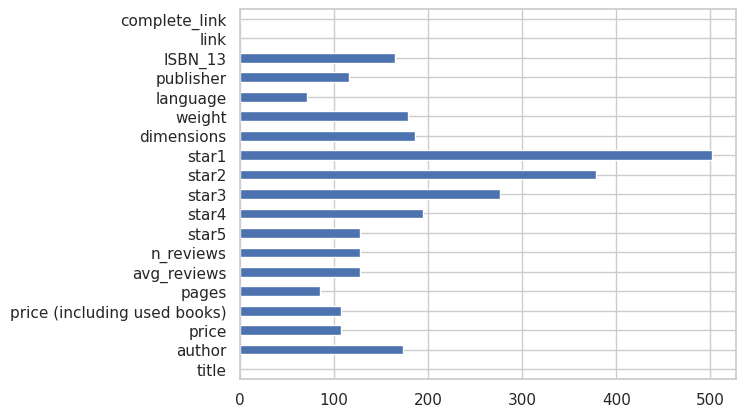

In [307]:
null_counts = df.isna().sum()

# Visualize the nulls
null_counts.plot(kind='barh')
plt.show()

In [308]:
# No all of the columns values should be replaced the same
#
# Columns to replace with 0:
stars_cols = list(df.loc[:, df.columns.str.startswith('star')].columns)
null_to_zero = ['dimensions','weight', 'n_reviews', 'avg_reviews', 'pages', 'price', 'price (including used books)'] + stars_cols

# Columns to replace wiht 'No Provided'
null_to_np = ['ISBN_13', 'publisher', 'language', 'author']
null_to_np

['ISBN_13', 'publisher', 'language', 'author']

In [309]:
# Replace as needed
df[null_to_zero] = df[null_to_zero].fillna(0)
df[null_to_np] = df[null_to_np].fillna('No Provided')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         830 non-null    object 
 1   author                        830 non-null    object 
 2   price                         830 non-null    float64
 3   price (including used books)  830 non-null    object 
 4   pages                         830 non-null    object 
 5   avg_reviews                   830 non-null    float64
 6   n_reviews                     830 non-null    object 
 7   star5                         830 non-null    object 
 8   star4                         830 non-null    object 
 9   star3                         830 non-null    object 
 10  star2                         830 non-null    object 
 11  star1                         830 non-null    object 
 12  dimensions                    830 non-null    object 
 13  weigh

In [310]:
df.head()

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23,55%,39%,6%,0,0,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,No Provided,33.72,21.49 - 33.72,484,4.3,124,61%,20%,9%,4%,6%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10,87%,13%,0,0,0,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,"1,686",75%,16%,5%,2%,2%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12,52%,17%,10%,10%,10%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...


### Replace Data Types

In [311]:
# First we remove extra chars
df[stars_cols] = df[stars_cols].replace('%', '', regex=True)
df['dimensions'] = df['dimensions'].replace(' inches', '', regex=True)
df['author'] = df['author'].replace([r'\[',r'\]',], ['',''], regex=True)
df['weight'] = df['weight'].replace([' pounds', ' ounces'], ['',''], regex=True)

# Remove all none numerical values and replace with 0
df['weight'] = pd.to_numeric(df['weight'], errors ='coerce').fillna(0)
df['pages'] = pd.to_numeric(df['pages'], errors ='coerce').fillna(0)

#Remove thousands comma
df[['pages','n_reviews']] = df[['pages','n_reviews']].replace(',', '', regex=True)

# Keep just one value, first value
df['price (including used books)'] = df['price (including used books)'].str.split(' -').str[0]

# Change Dtypes
df[stars_cols] = df[stars_cols].astype(int) / 100 #To decimals
df[['weight', 'price (including used books)', 'price', 'avg_reviews']] = df[['weight', 'price (including used books)', 'price', 'avg_reviews']].astype(float)
df[['pages', 'n_reviews']] = df[['pages', 'n_reviews']].astype(int)
df.head()

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,Dr Dhaval Maheta,6.75,6.75,500,4.4,23,0.55,0.39,0.06,0.00,0.00,8.5 x 1.01 x 11,2.53,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,No Provided,33.72,21.49,484,4.3,124,0.61,0.20,0.09,0.04,0.06,8 x 0.98 x 9.25,1.96,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"Oz du Soleil, and , Bill Jelen",32.07,32.07,274,4.7,10,0.87,0.13,0.00,0.00,0.00,8.25 x 0.6 x 10.75,1.40,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,William McKinney,53.99,53.99,547,4.6,1686,0.75,0.16,0.05,0.02,0.02,7 x 1.11 x 9.19,1.47,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,Paul McFedries,24.49,24.49,368,3.9,12,0.52,0.17,0.10,0.10,0.10,7.38 x 0.83 x 9.25,1.30,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...


In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         830 non-null    object 
 1   author                        830 non-null    object 
 2   price                         830 non-null    float64
 3   price (including used books)  722 non-null    float64
 4   pages                         830 non-null    int64  
 5   avg_reviews                   830 non-null    float64
 6   n_reviews                     830 non-null    int64  
 7   star5                         830 non-null    float64
 8   star4                         830 non-null    float64
 9   star3                         830 non-null    float64
 10  star2                         830 non-null    float64
 11  star1                         830 non-null    float64
 12  dimensions                    830 non-null    object 
 13  weigh

# FEATURE ENGINEERING



1.   Extract Dimension Values
2.   Rating/Ranking Column



### Extract Dimension Values

In [313]:
# cover_width X flap_width X cover_height
df[['cover_width','flap_width','cover_height']] = df['dimensions'].str.split(' x ', expand=True)
# Replace dtype
df['cover_width'] = pd.to_numeric(df['cover_width'], errors ='coerce').fillna(0)
df['flap_width'] = pd.to_numeric(df['flap_width'], errors ='coerce').fillna(0)
df['cover_height'] = pd.to_numeric(df['cover_height'], errors ='coerce').fillna(0)
df[['cover_width','flap_width','cover_height']] = df[['cover_width','flap_width','cover_height']].astype(float)
# Drop dimensions column
df.drop('dimensions', axis=1, inplace=True)

df[['cover_width','flap_width','cover_height']].head()

,cover_width,flap_width,cover_height
0,8.50,1.01,11.00
1,8.00,0.98,9.25
2,8.25,0.60,10.75
3,7.00,1.11,9.19
4,7.38,0.83,9.25


In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         830 non-null    object 
 1   author                        830 non-null    object 
 2   price                         830 non-null    float64
 3   price (including used books)  722 non-null    float64
 4   pages                         830 non-null    int64  
 5   avg_reviews                   830 non-null    float64
 6   n_reviews                     830 non-null    int64  
 7   star5                         830 non-null    float64
 8   star4                         830 non-null    float64
 9   star3                         830 non-null    float64
 10  star2                         830 non-null    float64
 11  star1                         830 non-null    float64
 12  weight                        830 non-null    float64
 13  langu

### Weighted Rating

In [315]:
# create the weighted_rating by multiplying every star column by its count of stars, then sum all, then devide by 100
df['weighted_rating'] = (df['star1']*1 + df['star2']*2 + df['star3']*3 + df['star4']*4 + df['star5']*5) / 100

df.head()

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,...,weight,language,publisher,ISBN_13,link,complete_link,cover_width,flap_width,cover_height,weighted_rating
0,Data Analysis Using R (Low Priced Edition): A ...,Dr Dhaval Maheta,6.75,6.75,500,4.4,23,0.55,0.39,0.06,...,2.53,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...,8.50,1.01,11.00,0.0449
1,Head First Data Analysis: A learner's guide to...,No Provided,33.72,21.49,484,4.3,124,0.61,0.20,0.09,...,1.96,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...,8.00,0.98,9.25,0.0426
2,Guerrilla Data Analysis Using Microsoft Excel:...,"Oz du Soleil, and , Bill Jelen",32.07,32.07,274,4.7,10,0.87,0.13,0.00,...,1.40,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...,8.25,0.60,10.75,0.0487
3,Python for Data Analysis: Data Wrangling with ...,William McKinney,53.99,53.99,547,4.6,1686,0.75,0.16,0.05,...,1.47,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...,7.00,1.11,9.19,0.0460
4,Excel Data Analysis For Dummies (For Dummies (...,Paul McFedries,24.49,24.49,368,3.9,12,0.52,0.17,0.10,...,1.30,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...,7.38,0.83,9.25,0.0388


# CLUSTER MODEL

1. Numerical values only
3. Elbow Method
4. K-Means model

### Numerical values only

In [316]:
# Make category codes, keep original columns
# Save the name of the new columns to acces later

# Get categorical columns
c = (df.dtypes == 'object')
categorical_cols = list(c[c].index)
categorical_codes = []

for col in df[categorical_cols]:
  col_name = col + '_cat'
  categorical_codes.append(col_name)
  df[col + '_cat'] = df[col].astype('category').cat.codes

categorical_codes

['title_cat',
 'author_cat',
 'language_cat',
 'publisher_cat',
 'ISBN_13_cat',
 'link_cat',
 'complete_link_cat']

### Elbow Method

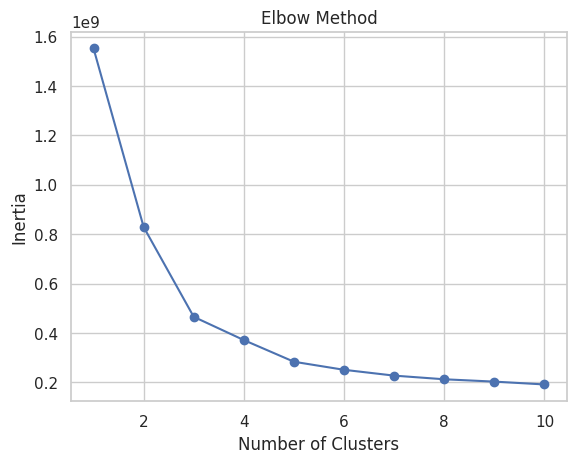

In [317]:
# Check inertias, elbow method
#
# Use columns revelant to ratio

inertias = []
# Get numerical and categorical code columns
numerical_cols = df.select_dtypes(include=['int', 'float']).columns
numerical_cols = list(numerical_cols)
numerical_cols.remove('weighted_rating')
cols = categorical_codes + list(numerical_cols)

df[cols] = df[cols].fillna(0)
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df[cols])
  inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### K-Means model

In [318]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[cols])

df['Cluster'] = kmeans.labels_
df['Cluster'].replace({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3'}, inplace=True)

df['Cluster'].unique()

array(['Cluster 1', 'Cluster 3', 'Cluster 2'], dtype=object)

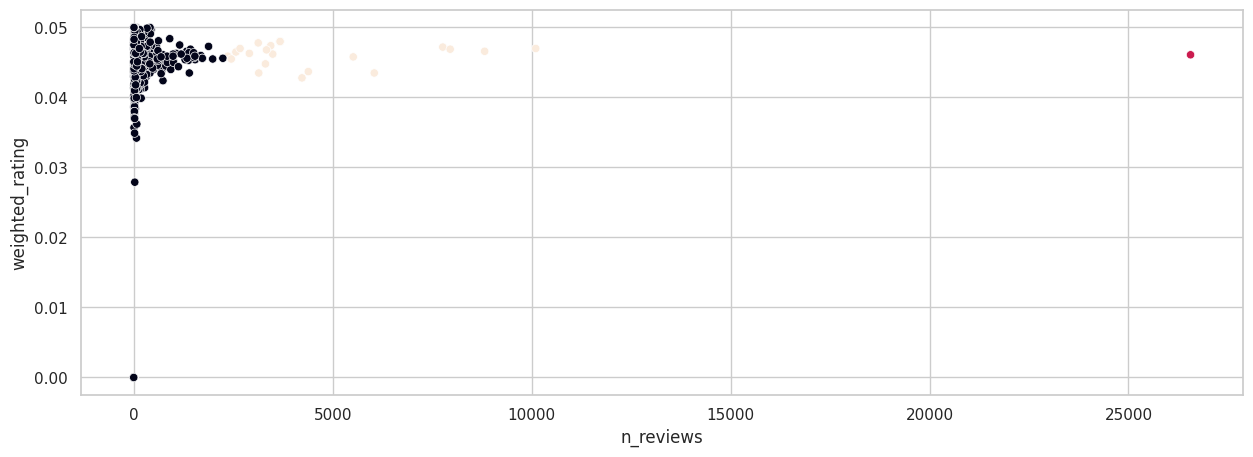

In [319]:
plt.figure(figsize=(15, 5))
# Plot data with cluster
sns.scatterplot(data=df, x='n_reviews', y='weighted_rating', c=kmeans.labels_)

plt.show()

<Axes: xlabel='count', ylabel='Cluster'>

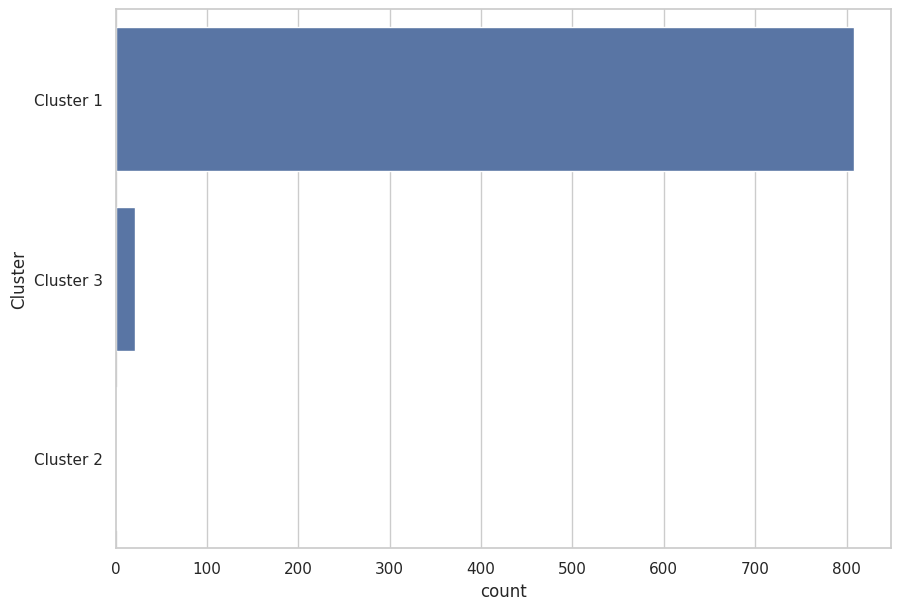

In [320]:
# Visualize Count of records y clusters
plt.figure(figsize=(10, 7))
sns.set_style('whitegrid')
sns.countplot(df['Cluster'])

In [321]:
# See the raw numbers
clusters_count = df.groupby('Cluster')['title'].count()

clusters_count

Cluster
Cluster 1    808
Cluster 2      1
Cluster 3     21
Name: title, dtype: int64

In [322]:
# weighted_rating by cluster and cluster count
weighted_rating_cluster = df.groupby('Cluster').agg({'weighted_rating':sum, 'title': np.size})
weighted_rating_cluster

,weighted_rating,title
Cluster,,
Cluster 1,30.9055,808
Cluster 2,0.0461,1
Cluster 3,0.9672,21


In [323]:
# Rescale the columns to compare
scaler = MinMaxScaler()
weighted_rating_cluster_scaled = pd.DataFrame(scaler.fit_transform(weighted_rating_cluster), columns=weighted_rating_cluster.columns)
weighted_rating_cluster_scaled

,weighted_rating,title
0,1.000000,1.000000
1,0.000000,0.000000
2,0.029848,0.024783


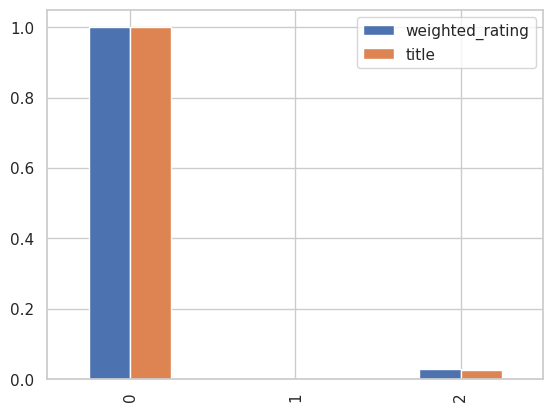

In [324]:
# Plot Scaled df
weighted_rating_cluster_scaled.plot(kind='bar')
plt.show()

# NEXT STEPS

1. Correlation Analyis
2. Machine Learning Models